# String Cleaner

### Task A

In [10]:
import pandas as pd 
df = {}
df['raw'] = pd.read_csv("messy_strings.csv")

# debug
# df['raw']

### Task B

In [11]:
# baseline Python approach
# def clean_strings(strings):
#     strings = df['raw'].values.tolist()
#     ret = []
#     for _ in strings:
#         for s in _:
#             curr = []
#             for x in s:
#                 if (ord(x) >= ord('a') and ord(x) <= ord('z')) or (ord(x) >= ord('0') and ord(x) <= ord('9')):
#                     curr.append(x)
#                 elif ord(x) >= ord('A') and ord(x) <= ord('Z'):
#                     curr.append(chr(ord(x)-ord('A')+ord('a')))
#             if len(curr) > 0:
#                 ret.append(''.join(curr))
#     return pd.DataFrame({'clean': ret})

# Pandas approach
import string
def clean_strings(strings):
    ret = strings['raw'].astype(str)
    ret = ret.str.strip()
    ret = ret.str.lower()
    for x in string.punctuation:
        ret = ret.str.replace(x,'')
    ret = ret.dropna()
    return pd.DataFrame({'clean':ret})

# debug
# df['clean'] = clean_strings(df['raw'])
# print(df['clean'])

### Task C

In [12]:
df['clean'] = clean_strings(df['raw'])

# debug
# print(df['raw'])
# print(df['clean'])

### Task D

In [13]:
print(f"Cleaned data has {df['clean']['clean'].size} rows.")
print(f"Cleaned data has {df['clean']['clean'].nunique()} unique names.")
print(f"Most common name in cleaned data is \"{df['clean']['clean'].value_counts().index[0]}\".")

Cleaned data has 50 rows.
Cleaned data has 6 unique names.
Most common name in cleaned data is "charlie".


### Task E

In [14]:
# reformat df so it can be converted to csv
reformat_dict = {'raw': [], 'clean': []}
for x in df['raw'].values.tolist():
    reformat_dict['raw'].append(x[0])
for x in df['clean'].values.tolist():
    reformat_dict['clean'].append(x[0])
df_reformat = pd.DataFrame(reformat_dict,index=range(50))

# to csv
df_reformat.to_csv('messy_strings_clean.csv', index=False)

# debug
# df_test = pd.read_csv('messy_strings_clean.csv')
# print(df_test)

### Task F

<Axes: >

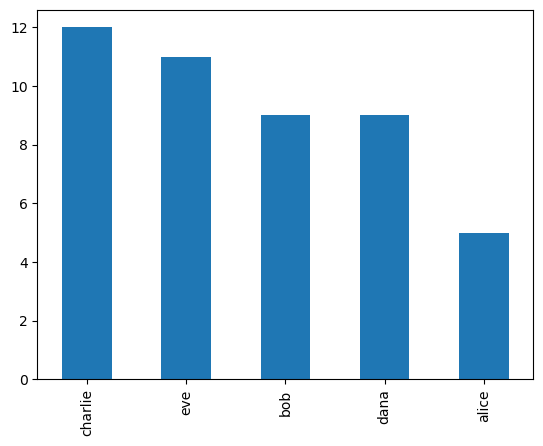

In [ ]:
# cleaning for names
top_5 = df['clean'].value_counts().head(5)
top_5_keys = top_5.keys()
o_dict = {}
for i in range(len(top_5)):
    o_dict[top_5_keys[i][0]] = top_5.iloc[i]
# display
pd.Series(o_dict).plot.bar()